
## What is the role of activation functions?

Activation functions are crucial in deep-learning models because they **introduce nonlinearity to the models**. For a feedforward neural network, they are actually the only nonlinearity in the model. To understand what would happen if you didn't use a nonlinear activation function, first review how to apply activation functions to the output of the linear transformation in a neuron:

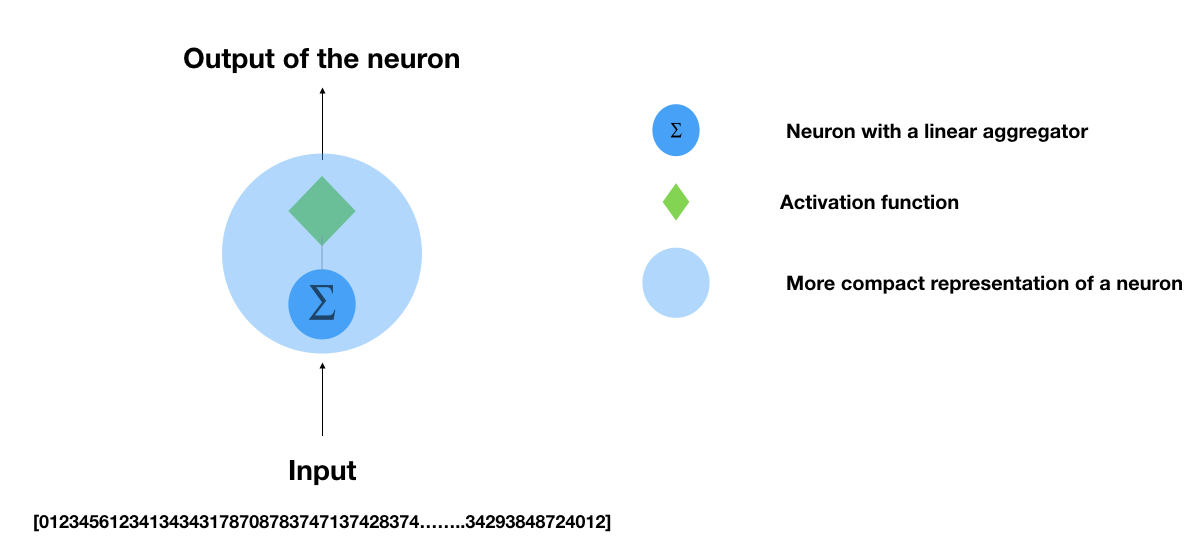

As depicted in the figure above, a neuron first multiplies each element of the input by its associated weight and then sums them up. This is just a linear transformation of the input:

$$y=b+x_1 \cdot w_1+x_2 \cdot w_2 + \ldots + x_n \cdot w_n$$

The activation functions come into play after this linear transformation. A neuron gives the result of the previous summation to an activation function, and then returns the result of that activation function:

$$Activation\_fn(y) = Activation\_fn(b+x_1 \cdot w_1+x_2 \cdot w_2 + \ldots + x_n \cdot w_n)$$

Here, $n$ represents the size of the input vector (or the number of features), $x_1,\ldots,x_n$ represents the values in the input vector of size $n$, and $b$ represents the bias term. $w_1,\ldots,w_n$ represents the weights of the neuron. The $b$ and $w_i$ values are the parameters to be estimated.

To better understand the role of the activation functions, assume that neurons in a layer just output the results of the linear summations. These will be the inputs of the next layer. Again, assume that the neurons of the next layer also output the results of their linear summations. Hence, the output of a neuron in this second layer would be as follows:

$$y_2 = b + o_1 \cdot w_1+o_2 \cdot w_2+\ldots+o_n \cdot w_n$$

Where $o_1, o_2,\ldots, o_n$ denotes the outputs of the neurons of the previous layer. If you substitute $o_1, o_2,\ldots, o_n$, like $o_1 = b+x_1\cdot w_1+x_2 \cdot w_2+ \ldots +x_n \cdot w_n$, then the output of that neuron will be something like the following:

$$y_2=b_2+x_1 \cdot k_1 \cdot w_1+ x_2\cdot k_2 \cdot w_2+\ldots+x_n\cdot k_n\cdot w_n$$

This means that if you update the weights of the neuron from $w_1$ to $k_1\cdot w_1$, then you can say that the neurons from the second layer also accept the original inputs of the previous layer. As a result, the first layer is unnecessary! In short, the neurons in a layer just spit out the linear transformation of the input to the next layer. Then the next layer does the same thing, and so on and so forth. In the end, the final result can be rewritten as the output of a single layer! Hence, activation functions enable deep neural networks to have stacked layers—and this is why they are so crucial. In a nutshell, this can be summed up as follows:

If you don't use nonlinear activation functions in your neurons, then stacking multiple layers on top of each other becomes unnecessary—and all of the layers can be collapsed to a single layer. Thus, deep learning *must* use nonlinear activation functions in the neurons.

Next, review some common activation functions.

## Activation functions

There are many activation functions out there, and research into discovering new ones is a hot topic in the deep-learning literature. Next, you'll explore some popular activation functions that have common applicability in real-world tasks. The figure below lists some of them, along with their mathematical formulas and what they look like graphically.


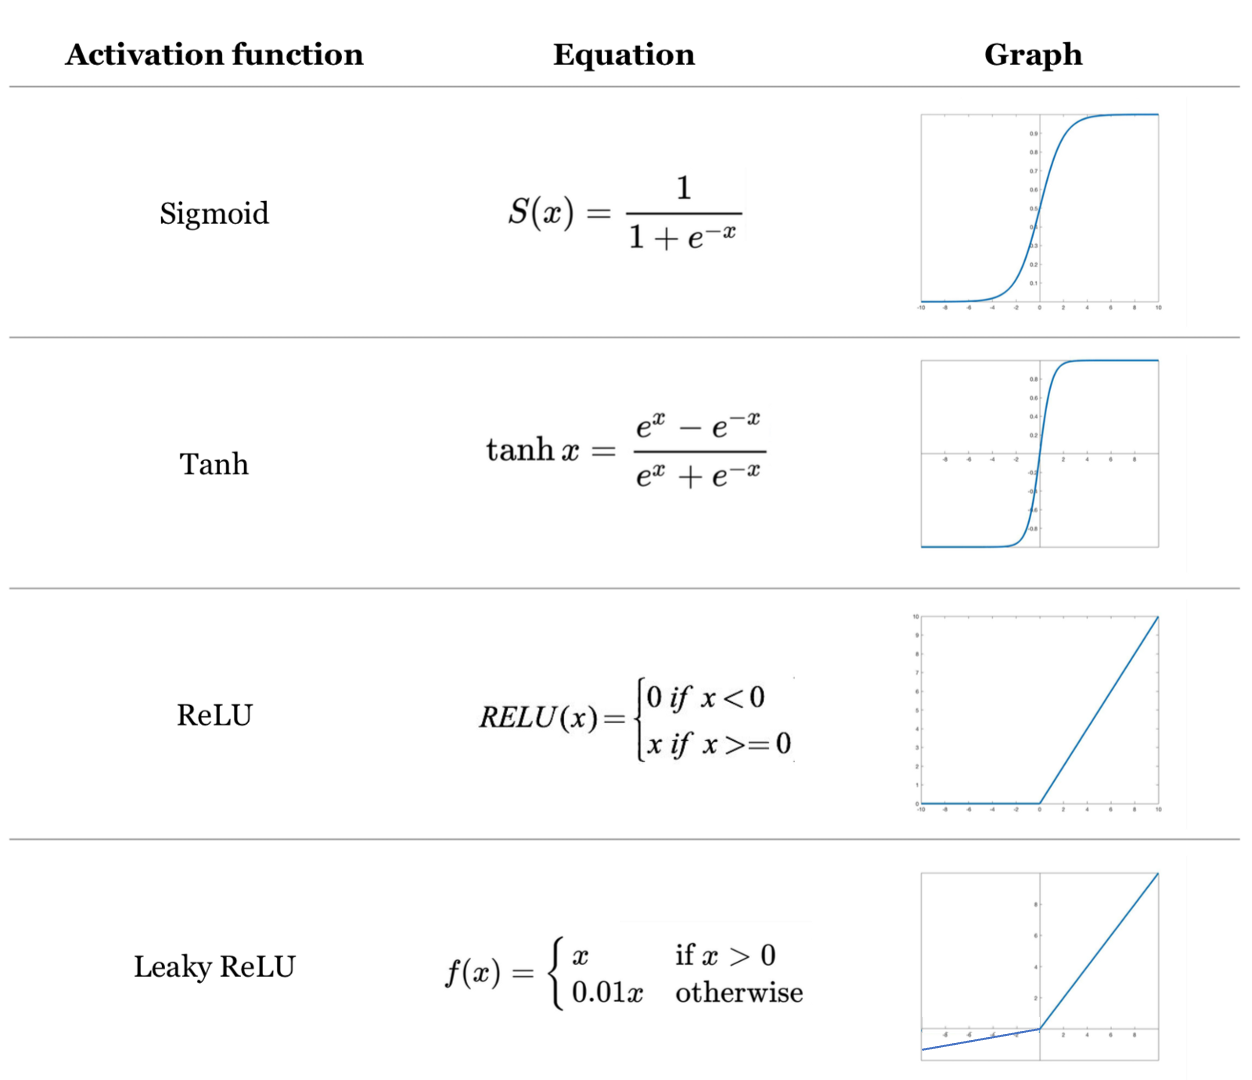

Next, you'll briefly learn about each of these activation functions.

### Sigmoid

You might remember the *sigmoid function* from binary logistic regression. This historically popular function is believed to mimic the activation in biological brains. Mathematically, the sigmoid function is defined as follows:

$$\sigma(x)=1+\dfrac{1}{e^{-x}}$$

Though the sigmoid function is one of the popular activation functions used in deep-learning models, its popularity is diminishing because of several reasons:

* **It's nonzero centered.** It results in zigzags during optimization.
* **It results in vanishing gradient or saturation.** For high values of input values, the learning becomes very, very slow because the gradient (derivatives) becomes very close to zero! You'll learn about gradients in the next lesson.
* **Because of the vanishing gradient, a careful initialization of the weights of the network is important.** But finding good enough values for initializing the parameters isn't always trivial.

In Keras, you can define sigmoid as the activation function of a dense layer as follows:

```python
Dense(1028, input_shape=(784,), activation="sigmoid")
```

### Hyperbolic tangent

*Hyperbolic tangent* (tanh) is another popular activation function. It's actually a scaled version of sigmoid:

$$tanh(x)=2\sigma(2x)-1$$

Unlike sigmoid, it's zero centered. However, like sigmoid, it also saturates and results in a vanishing gradient problem.

In Keras, you can define hyperbolic tangent as the activation function of a dense layer as follows:

```python
Dense(1028, input_shape=(784,), activation="tanh")
```

### Rectified linear units

*Rectified linear unit* (ReLU) is probably the most common activation function in deep-learning literature. If you recall, you also used it in the layers of the model that you implemented in the previous lesson. Some properties of ReLU are as follows:

* It cuts off values below zero.
* It's nonsaturating.
* It enables models to converge faster than sigmoid and tanh.
* It's easy to implement.
* However, using ReLU in the networks may cause some neurons to irreversibly die! If you set the learning rate too high, as many as 40% of the neurons can die.

In Keras, you can define ReLU as the activation function of a dense layer as follows:

```python
Dense(1028, input_shape=(784,), activation="relu")
```

### Leaky ReLU

*Leaky ReLU* was proposed to solve the dying neurons problem that can occur when using ReLU. Usually, you'll set the slope to be `0.1` when `x` is negative. That being said, there are other variants of leaky ReLU:

* **Parametric ReLU** (PReLU) is a variant of leaky ReLU. In PReLU, the slope when `x` is negative isn't predefined; instead, it's a parameter to learn.
* **MaxOut** is defined as $max(a_1x+b_1,a_2x+b_2)$. Here, there are two parametric slopes. ReLU, leaky ReLU, and PReLU are special cases of MaxOut. This more general approach solves the problems associated with the more constrained versions that were covered earlier, but the parameters to learn double!

In Keras, leaky ReLU is available in the `layers` module instead of the `activations` module, unlike the other activation functions that you learned about previously. If you want to use leaky ReLU as the activation function for a layer, then you can add it as a layer like this:

```python
model.add(Dense(1028, input_shape=(784,)))
model.add(keras.layers.LeakyReLU(alpha=0.3))
```

### Softmax

The last activation function that you need to know about is the famous *softmax* function. You may recall softmax from multiclass logistic regression. Using softmax in the output layer of a deep neural network is quite common in classification tasks. What makes softmax very popular in the output layer is that its outputs can be read as probabilities. So, almost always, you want to add softmax as the activation function of the output layer when you're implementing classification models.

Mathematically, softmax is expressed as follows:

$$\frac{\exp^{-x_i}}{\sum{\exp^{-x_j}}}$$

In Keras, you can define softmax as the activation function of a dense layer as follows:

```python
Dense(10, input_shape=(784,), activation="softmax")
```

## Keras' `activations` module

To round out the discussion of activation functions, briefly explore the `activations` module of Keras. In Keras, activation functions can either be used through an activation layer, or through the activation argument supported by all forward layers:

```python
from tensorflow.keras.layers import Activation, Dense
model.add(Dense(64))
model.add(Activation('tanh'))
```

This is equivalent to the following:

```python
model.add(Dense(64, activation='tanh'))
```

If you're using Keras as standalone instead of through TensorFlow, you can also pass an element-wise TensorFlow function as an activation:

```python
from keras import backend as K
model.add(Dense(64, activation=K.tanh))
```

More complex activations (such as learnable activations, which maintain a state) are available as advanced activation layers. In the `keras.layers` module, you can find some of these, including `PReLU` and `LeakyReLU`. To see all the activations that Keras supports, consult the [Keras documentation](https://keras.io/layers/advanced-activations/).

## Loss functions

So far in this lesson, you've seen several activation functions. In a typical neural network, you'll have millions of parameters to determine. So, the natural next step in this discussion is to figure out how to find the best parameters in your neural networks.

To determine the best parameters, you'll need *optimization algorithms*. As you'll see later in this module, the most commonly used optimization algorithms are variants of the *gradient descent* algorithm. Here you'll learn about the *loss functions* (also called *cost functions*) that quantify how well your models perform. Then, in the next lesson, you'll learn how to use them to train a neural network.

### What are loss functions?

> "The function we want to minimize or maximize is called the objective function or criterion. When we are minimizing it, we may also call it the cost function, loss function, or error function." —[Deep Learning](https://mitpress.mit.edu/books/deep-learning)

*Loss functions* enable you to measure how well your model is doing. Since you're quantifying the performance of your models, you need to choose your loss functions appropriately. This is why there are various loss functions, and some can perform better than others for specific kinds of tasks. Because the result of a model is produced at the last layer of a neural network, the losses of a model are calculated by feeding the model's outputs into the associated loss function. In Keras, you define the loss when you're compiling your models, like this:

```python
from tensorflow.keras import losses
# You can provide the loss as a string
model.compile(optimizer='sgd',
              loss='categorical_crossentropy')

# Or you can provide the class
model.compile(optimizer='sgd',
              loss=losses.categorical_crossentropy)
```
Generally speaking, you can categorize loss functions into two groups: those that are for classification models and those that are for regression models. Now, consider each group separately.

### Loss functions for classification

In classification tasks, the models usually output probabilities for each category as a result of the softmax (activation) layer.

#### Hinge loss

The correct category's score should be greater than the sum of the scores of all incorrect categories by some safety margin. (Usually, the safety margin is set to `1`.) Hence, *hinge loss* is used for maximum-margin classification. Most notably, hinge loss is used for support vector machines. Although it isn't differentiable, it's a convex function—which makes it easy to work with the convex optimizers that are typically used in the machine-learning domain. Mathematically, hinge loss is defined as follows:

$$\sum_{j \neq y_i}max(0, s_j-s_{y_i}+1)$$

Here, $s_j$ is the maximum of predicted decisions for all other labels, and $s_{y_i}$ is the predicted decision for the true label.

In Keras, you can use it as follows:

```python

# For binary classification
model.compile(optimizer='sgd',
              loss=keras.losses.hinge)

# For multiclass classification
model.compile(optimizer='sgd',
              loss=keras.losses.categorical_hinge)
```

#### Cross-entropy loss

*Cross-entropy loss* is the most common loss function for classification problems. Cross-entropy loss increases as the predicted probability diverges from the actual label. Technically, cross-entropy comes from the field of information theory and is measured in *bits*. *Cross-entropy* is used to quantify the difference between estimated and predicted probability distributions.

When modeling a classification problem where you are interested in mapping input variables to a class label, you can model the problem as predicting the probability of an example belonging to a given class. For example, there are two classes in a binary classification problem, so you can predict the probability of the example belonging to the first class. And for multiclass classification, you can predict the probability of the example belonging to each of the classes.

Therefore, your goal is to identify a set of model weights that minimize the difference between the model's predicted probability distribution (given the dataset), and the distribution of probabilities in the training dataset.

> "Most modern neural networks are trained using maximum likelihood. This means that the cost function is … described as the cross-entropy between the training data and the model distribution." —*Deep Learning*

Mathematically, cross-entropy is defined as follows:

$$\sum_{i}(y_i log(\hat{y}_i) + (1-y_i)log(1 - \hat{y}_i))$$

Notice that when the actual label is `1` ($y_i = 1$), the second half of the function disappears. And when the actual label is `0` ($y_i = 0$), the first half disappears. In short, you are just multiplying the log of the actual predicted probability for the ground-truth class. An important aspect of this is that cross-entropy loss heavily penalizes the predictions that are confident but wrong.

In Keras, you can use cross-entropy loss as follows:

```python

# For one-hot encoded outputs
model.compile(optimizer='sgd',
              loss=keras.losses.categorical_crossentropy)

# For single integer-valued outputs
model.compile(optimizer='sgd',
              loss=keras.losses.sparse_categorical_crossentropy)
```

### Loss functions for regression

The outputs of the regression models are real-valued continuous values. So, you need to have a single value as the output. This is why the last layer of a regression model should include only a single neuron.

#### Mean squared error

As the name suggests, *mean squared error* (MSE) is measured as the average of the squared difference between predictions and actual observations. MSE is only concerned with the average magnitude of error, irrespective of the direction. However, due to squaring, predictions that are far away from actual values are penalized heavily in comparison to less deviated predictions. Moreover, MSE also has nice mathematical properties that make it easier to calculate gradients.

Mathematically, MSE is defined as follows:

$$\frac{\sum_{i}^{n}(y_i - \hat{y}_i)^2}{n}$$

In Keras, you can use it as follows:
```python

model.compile(optimizer='sgd',
              loss=keras.losses.mean_squared_error)
```

#### Mean absolute error

*Mean absolute error* (MAE), on the other hand, is measured as the average of the sum of absolute differences between predictions and actual observations. Like MSE, this measures the magnitude of error without considering the direction. But unlike MSE, MAE needs more complicated tools such as linear programming to compute the gradients. Plus, MAE is more robust to outliers because it does not make use of squaring.

Mathematically, MAE is defined like this:

$$\frac{\sum_{i}^{n}|y_i - \hat{y}_i|}{n}$$

In Keras, you can use it as follows:
```python

model.compile(optimizer='sgd',
              loss=keras.losses.mean_absolute_error)
```